### Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

### Metric
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

Sample submission file that assume only female passengers survived gives an accuracy score of 0.76555.

### Explanatory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
PassengerId = test['PassengerId']

In [3]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.groupby('Pclass')['Survived'].mean()
# People from class 1 (high class) mostly survived while the ones from class 3 did not
# Would be a good idea to seperate other columns according to social classes as it is significantly correlated to target

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [7]:
#train.Name

### Name Column

In [8]:
# Extract all tiles from train and test sets
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
train.drop('Name', axis=1, inplace=True)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')
test.drop('Name', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [9]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [10]:
train.groupby('Title').PassengerId.count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [11]:
train.groupby('Title')['Survived'].mean()

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [12]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [13]:
train['Title'] = train['Title'].replace(['Mlle', 'Ms'], 'Miss')
train['Title'] = train['Title'].replace(['Countess', 'Lady', 'Mme'], 'Mrs')
train['Title'] = train['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Mr')

test['Title'] = test['Title'].replace(['Mlle', 'Ms'], 'Miss')
test['Title'] = test['Title'].replace(['Countess', 'Lady', 'Mme', 'Dona'], 'Mrs')
test['Title'] = test['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Mr')

train.groupby('Title')['Survived'].mean()

Title
Master    0.575000
Miss      0.702703
Mr        0.161710
Mrs       0.796875
Name: Survived, dtype: float64

In [14]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Age column

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
       16., 13., 11.,  4.,  5.,  1.,  1.]), array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
       32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
       64.084, 68.063, 72.042, 76.021, 80.   ]), <a list of 20 Patch objects>)


C:\Users\Philippe\Anaconda3\envs\DeepLearning\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Philippe\Anaconda3\envs\DeepLearning\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


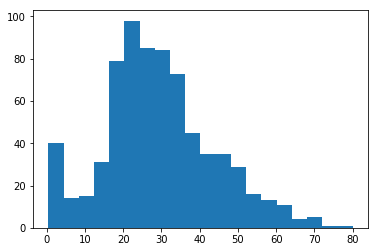

In [15]:
# Binning feature for Age
Age_intervals = plt.hist(train['Age'], bins=20)
print(Age_intervals)

In [16]:
train['AgeBins'] = pd.cut(train['Age'], 20, labels=False)
test['AgeBins'] = pd.cut(test['Age'], Age_intervals[1], labels=False)

train.groupby('AgeBins')['Survived'].mean().sort_values(ascending=False)

AgeBins
19.0    1.000000
0.0     0.675000
1.0     0.642857
3.0     0.483871
12.0    0.482759
8.0     0.479452
13.0    0.437500
7.0     0.416667
14.0    0.384615
9.0     0.377778
5.0     0.367347
15.0    0.363636
6.0     0.352941
10.0    0.342857
11.0    0.342857
4.0     0.341772
2.0     0.266667
18.0    0.000000
16.0    0.000000
17.0    0.000000
Name: Survived, dtype: float64

In [17]:
mean = train['AgeBins'].mean()
train['AgeBins'].fillna(mean,inplace=True)
test['AgeBins'].fillna(mean,inplace=True)

### Ticket column

In [18]:
# What can we do to transform the Ticket column into something more meaningful?
train.Ticket.describe()
# There are many duplicated tickets. Many passengers have the same ticket number. (210 tickets)

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [19]:
#train[train.duplicated('Ticket')].sort_values('Ticket')

In [20]:
if False:
    # Make two categories with the ticket number. 0 if it contains a letter, 1 otherwise
    train['Ticket_cat'] = train.Ticket.str.isalnum() * 1
    train.drop('Ticket', axis=1, inplace=True)
    test['Ticket_cat'] = test.Ticket.str.isalnum() * 1
    test.drop('Ticket', axis=1, inplace=True)

    # Check if one of the categories survived more than the other
    train.groupby('Ticket_cat')['Survived'].mean()
    # Absolutely not linked to target variable!

### Fare column

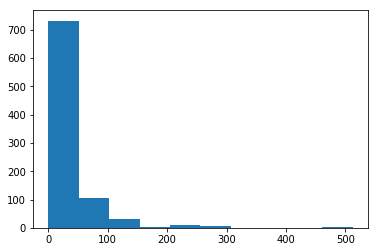

In [21]:
# Binning features for Fare
Fare_intervals = plt.hist(train['Fare'], bins=10)

In [22]:
train['FareBins'] = pd.cut(train['Fare'], 10, labels=False)
test['FareBins'] = pd.cut(test['Fare'], Fare_intervals[1], labels=False)

train.groupby('FareBins')['Survived'].mean().sort_values(ascending=False)

FareBins
9    1.000000
3    1.000000
2    0.741935
5    0.666667
1    0.660377
4    0.636364
0    0.318306
Name: Survived, dtype: float64

In [23]:
mean = train['FareBins'].mean()
test['FareBins'].fillna(mean,inplace=True)

### Cabin column

In [24]:
# Get letter from cabin
train['Cabin_letter'] = train.Cabin.str.extract('([A-Za-z]+)')
train['Cabin_letter'].fillna('Z', inplace=True)
test['Cabin_letter'] = test.Cabin.str.extract('([A-Za-z]+)')
test['Cabin_letter'].fillna('Z', inplace=True)

In [25]:
train.groupby('Cabin_letter')['Survived'].mean().sort_values(ascending=False)

Cabin_letter
D    0.757576
E    0.750000
B    0.744681
F    0.615385
C    0.593220
G    0.500000
A    0.466667
Z    0.299854
T    0.000000
Name: Survived, dtype: float64

In [26]:
train['Cabin_letter'] = train['Cabin_letter'].replace('T', 'Z')

In [27]:
train.groupby('Cabin_letter')['Survived'].count()

Cabin_letter
A     15
B     47
C     59
D     33
E     32
F     13
G      4
Z    688
Name: Survived, dtype: int64

In [28]:
# Get number of cabins booked
train['Cabin_#booked'] = train['Cabin'].str.split().str.len()
test['Cabin_#booked'] = test['Cabin'].str.split().str.len()

In [29]:
train.groupby('Cabin_#booked')['Survived'].mean()

Cabin_#booked
1.0    0.677778
2.0    0.562500
3.0    0.500000
4.0    1.000000
Name: Survived, dtype: float64

In [30]:
train.groupby('Cabin_#booked')['Survived'].count()

Cabin_#booked
1.0    180
2.0     16
3.0      6
4.0      2
Name: Survived, dtype: int64

In [31]:
# Create Fare per Cabin feature
train['Fare/cabin'] = train['Fare'] / train['Cabin_#booked']
test['Fare/cabin'] = test['Fare'] / test['Cabin_#booked']

(array([28., 58., 50., 38., 12.,  9.,  2.,  0.,  6.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.]), array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
       153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
       307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
       461.09628, 486.71274, 512.3292 ]), <a list of 20 Patch objects>)


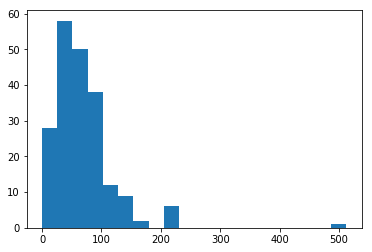

In [32]:
FareCabin_intervals = plt.hist(train['Fare/cabin'], bins=20)
print(FareCabin_intervals)

In [33]:
train['FareCabinBins'] = pd.cut(train['Fare/cabin'], 20, labels=False)
test['FareCabinBins'] = pd.cut(test['Fare/cabin'], FareCabin_intervals[1], labels=False)

train.groupby('FareCabinBins')['Survived'].mean().sort_values(ascending=False)

FareCabinBins
19.0    1.000000
6.0     1.000000
5.0     0.888889
3.0     0.763158
2.0     0.740000
8.0     0.666667
4.0     0.583333
1.0     0.568966
0.0     0.535714
Name: Survived, dtype: float64

In [34]:
train['Cabin_#booked'].fillna(0, inplace=True)
test['Cabin_#booked'].fillna(0, inplace=True)

In [35]:
mean = train['FareCabinBins'].mean()
train['FareCabinBins'].fillna( mean, inplace=True)
test['FareCabinBins'].fillna( mean, inplace=True)

### SibSp and Parch column

In [36]:
train.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [37]:
train.groupby('SibSp')['Survived'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64

In [38]:
train.groupby('Parch')['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [39]:
train.groupby('Parch')['Survived'].count()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64

In [40]:
# Create family aboard feature
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

In [41]:
train.groupby('Family')['Survived'].mean()

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [42]:
train.groupby('Family')['Survived'].count()

Family
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Survived, dtype: int64

In [43]:
train.corr()
#Correlated pairs: (Survived, Pclass), (Survived, Fare), (Pclass, Age), (Pclass, Fare), 
# (over 0.2)       (Age, SibSp), (Age, Parch), (SibSp, Parch), (Parch, Fare)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeBins,FareBins,Cabin_#booked,Fare/cabin,FareCabinBins,Family
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.029539,0.016843,0.015536,0.050143,0.028921,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.073732,0.232812,0.277053,0.153307,0.067821,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.327467,-0.481380,-0.647116,-0.350577,-0.111690,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.996924,0.097840,0.172708,-0.004452,0.013580,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.231389,0.100178,0.012150,0.095506,0.024888,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.177538,0.146101,0.127846,0.141935,0.054063,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.088342,0.974703,0.596171,0.824652,0.575515,0.217138
AgeBins,0.029539,-0.073732,-0.327467,0.996924,-0.231389,-0.177538,0.088342,1.000000,0.091414,0.162151,0.004185,0.012701,-0.246841
FareBins,0.016843,0.232812,-0.481380,0.097840,0.100178,0.146101,0.974703,0.091414,1.000000,0.580871,0.796094,0.593763,0.141458
Cabin_#booked,0.015536,0.277053,-0.647116,0.172708,0.012150,0.127846,0.596171,0.162151,0.580871,1.000000,0.029510,0.004160,0.072174


### Variable encoding

In [44]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

train['Sex'] = LE.fit_transform(train['Sex'])
test['Sex'] = LE.transform(test['Sex'])

# One-hot encoding
#train['Title'] = LB.fit_transform(train['Title'])
train = pd.concat([train, pd.get_dummies(train['Title'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['Title'])], axis=1)

embarked = pd.get_dummies(train['Embarked'])
embarked.columns = ['Ch', 'Q', 'S']
train = pd.concat([train, embarked], axis=1)
embarked = pd.get_dummies(test['Embarked'])
embarked.columns = ['Ch', 'Q', 'S']
test = pd.concat([test, embarked], axis=1)

train = pd.concat([train, pd.get_dummies(train['Cabin_letter'])], axis=1)
test = pd.concat([test, pd.get_dummies(test['Cabin_letter'])], axis=1)

In [45]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'AgeBins', 'FareBins',
       'Cabin_letter', 'Cabin_#booked', 'Fare/cabin', 'FareCabinBins',
       'Family', 'Master', 'Miss', 'Mr', 'Mrs', 'Ch', 'Q', 'S', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'Z'],
      dtype='object')

### Feature Interactions

In [46]:
# Features interactions with the following categories ['Pclass', 'Sex', 'AgeBins', 'Family']

train['Pclass_Sex'] = train['Pclass'] * train['Sex']
train['Pclass_AgeBins'] = train['Pclass'] * train['AgeBins']
train['Pclass_Family'] = train['Pclass'] * train['Family']
train['Sex_AgeBins'] = train['Sex'] * train['AgeBins']
train['Sex_Family'] = train['Sex'] * train['Family']
train['AgeBins_Family'] = train['AgeBins'] * train['Family']
train['Pclass_Sex_AgeBins'] = train['Pclass'] * train['Sex'] * train['AgeBins']

test['Pclass_Sex'] = test['Pclass'] * test['Sex']
test['Pclass_AgeBins'] = test['Pclass'] * test['AgeBins']
test['Pclass_Family'] = test['Pclass'] * test['Family']
test['Sex_AgeBins'] = test['Sex'] * test['AgeBins']
test['Sex_Family'] = test['Sex'] * test['Family']
test['AgeBins_Family'] = test['AgeBins'] * test['Family']
test['Pclass_Sex_AgeBins'] = test['Pclass'] * test['Sex'] * test['AgeBins']

### Target Encoding

In [47]:
if True:
    # Mean encoding of original features
    # Mean encoding with single groupbys
    encoding_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'AgeBins', 'FareBins', \
                     'Cabin_letter', 'Cabin_#booked', 'Family']
    global_mean = train['Survived'].mean()

    for feature in encoding_list:
        train['ME_' + feature] = train[feature].map( train.groupby([feature])['Survived'].mean() )
        train['ME_' + feature].fillna(global_mean, inplace=True)
        test['ME_' + feature] = test[feature].map( train.groupby([feature])['Survived'].mean() )
        test['ME_' + feature].fillna(global_mean, inplace=True)

In [48]:
if True:
    # Mean encoding of interaction features
    # Mean encoding with single groupbys
    interaction_list = ['Pclass_Sex', 'Pclass_AgeBins', 'Pclass_Family', 'Sex_AgeBins', 'Sex_Family', 'AgeBins_Family', 'Pclass_Sex_AgeBins']
    global_mean = train['Survived'].mean()

    for feature in interaction_list:
        train['ME_' + feature] = train[feature].map( train.groupby([feature])['Survived'].mean() )
        train['ME_' + feature].fillna(global_mean, inplace=True)
        test['ME_' + feature] = test[feature].map( train.groupby([feature])['Survived'].mean() )
        test['ME_' + feature].fillna(global_mean, inplace=True)

In [49]:
if True:
    # Mean encoding regularization with cross-validation (LOO)
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 891, shuffle = True)
    regularization_list = encoding_list + interaction_list
    
    for feature in regularization_list:
        print(feature)
        for tr_ind, val_ind in kf.split(train):
            X_tr, X_val = train.iloc[tr_ind], train.iloc[val_ind]
            train.loc[val_ind, 'ME_' + feature] = X_val[feature].map( X_tr.groupby([feature])['Survived'].mean() )
        train['ME_' + feature].fillna(global_mean, inplace=True)

Pclass
Sex
SibSp
Parch
Embarked
Title
AgeBins
FareBins
Cabin_letter
Cabin_#booked
Family
Pclass_Sex
Pclass_AgeBins
Pclass_Family
Sex_AgeBins
Sex_Family
AgeBins_Family
Pclass_Sex_AgeBins


### Drop columns

In [50]:
# Drop columns
# Modified features
train.drop('Fare', axis=1, inplace = True)
test.drop('Fare', axis=1, inplace = True)
train.drop('Cabin', axis=1, inplace = True)
test.drop('Cabin', axis=1, inplace = True)
train.drop('Age', axis=1, inplace = True)
test.drop('Age', axis=1, inplace = True)
train.drop('Ticket', axis=1, inplace = True)
test.drop('Ticket', axis=1, inplace = True)
train.drop('Fare/cabin', axis=1, inplace = True)
test.drop('Fare/cabin', axis=1, inplace = True)

# One-hot encoded categories
train.drop('Title', axis=1, inplace = True)
test.drop('Title', axis=1, inplace = True)
train.drop('Embarked', axis=1, inplace = True)
test.drop('Embarked', axis=1, inplace = True)
train.drop('Cabin_letter', axis=1, inplace = True)
test.drop('Cabin_letter', axis=1, inplace = True)

# Mean encoded categories that were not one-hot encoded and that are not ordinal
#train.drop('Pclass', axis=1, inplace = True)
#test.drop('Pclass', axis=1, inplace = True)
train.drop('Sex', axis=1, inplace = True)
test.drop('Sex', axis=1, inplace = True)
#train.drop('SibSp', axis=1, inplace = True)
#test.drop('SibSp', axis=1, inplace = True)
#train.drop('Parch', axis=1, inplace = True)
#test.drop('Parch', axis=1, inplace = True)
#train.drop('AgeBins', axis=1, inplace = True)
#test.drop('AgeBins', axis=1, inplace = True)
#train.drop('FareBins', axis=1, inplace = True)
#test.drop('FareBins', axis=1, inplace = True)
#train.drop('Cabin_#booked', axis=1, inplace = True)
#test.drop('Cabin_#booked', axis=1, inplace = True)
#train.drop('Family', axis=1, inplace = True)
#test.drop('Family', axis=1, inplace = True)

# Interaction features
train.drop('Pclass_Sex', axis=1, inplace = True)
test.drop('Pclass_Sex', axis=1, inplace = True)
train.drop('Pclass_AgeBins', axis=1, inplace = True)
test.drop('Pclass_AgeBins', axis=1, inplace = True)
train.drop('Pclass_Family', axis=1, inplace = True)
test.drop('Pclass_Family', axis=1, inplace = True)
train.drop('Sex_AgeBins', axis=1, inplace = True)
test.drop('Sex_AgeBins', axis=1, inplace = True)
train.drop('Sex_Family', axis=1, inplace = True)
test.drop('Sex_Family', axis=1, inplace = True)
train.drop('AgeBins_Family', axis=1, inplace = True)
test.drop('AgeBins_Family', axis=1, inplace = True)
train.drop('Pclass_Sex_AgeBins', axis=1, inplace = True)
test.drop('Pclass_Sex_AgeBins', axis=1, inplace = True)

# Other drops
#train.drop('PassengerId', axis=1, inplace = True)
#test.drop('PassengerId', axis=1, inplace = True)

In [51]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'AgeBins',
       'FareBins', 'Cabin_#booked', 'FareCabinBins', 'Family', 'Master',
       'Miss', 'Mr', 'Mrs', 'Ch', 'Q', 'S', 'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'Z', 'ME_Pclass', 'ME_Sex', 'ME_SibSp', 'ME_Parch', 'ME_Embarked',
       'ME_Title', 'ME_AgeBins', 'ME_FareBins', 'ME_Cabin_letter',
       'ME_Cabin_#booked', 'ME_Family', 'ME_Pclass_Sex', 'ME_Pclass_AgeBins',
       'ME_Pclass_Family', 'ME_Sex_AgeBins', 'ME_Sex_Family',
       'ME_AgeBins_Family', 'ME_Pclass_Sex_AgeBins'],
      dtype='object')

In [52]:
train.isna().sum()

PassengerId              0
Survived                 0
Pclass                   0
SibSp                    0
Parch                    0
AgeBins                  0
FareBins                 0
Cabin_#booked            0
FareCabinBins            0
Family                   0
Master                   0
Miss                     0
Mr                       0
Mrs                      0
Ch                       0
Q                        0
S                        0
A                        0
B                        0
C                        0
D                        0
E                        0
F                        0
G                        0
Z                        0
ME_Pclass                0
ME_Sex                   0
ME_SibSp                 0
ME_Parch                 0
ME_Embarked              0
ME_Title                 0
ME_AgeBins               0
ME_FareBins              0
ME_Cabin_letter          0
ME_Cabin_#booked         0
ME_Family                0
ME_Pclass_Sex            0
M

In [53]:
train.corr()['Survived'].sort_values(ascending=False)

Survived                 1.000000
ME_Pclass_Sex_AgeBins    0.566020
ME_Title                 0.564430
ME_Pclass_Sex            0.559258
ME_Sex_AgeBins           0.555953
ME_Sex                   0.540330
Mrs                      0.347864
Miss                     0.335636
ME_Pclass                0.330457
ME_Pclass_Family         0.321067
ME_Cabin_#booked         0.306045
ME_Cabin_letter          0.304923
ME_Pclass_AgeBins        0.301205
ME_Family                0.277641
Cabin_#booked            0.277053
ME_FareBins              0.275346
FareBins                 0.232812
ME_AgeBins_Family        0.181839
ME_SibSp                 0.179101
B                        0.175095
Ch                       0.168240
ME_Embarked              0.152645
D                        0.150716
E                        0.145321
ME_Parch                 0.140334
ME_Sex_Family            0.130967
C                        0.114652
ME_AgeBins               0.113168
Master                   0.085221
Parch         

### Create X_test, X_train, y_train, X_validation, y_validation

In [54]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test

## Unsupervised learning

### Principal Component Analysis

In [55]:
from sklearn import decomposition

pca = decomposition.PCA(2).fit_transform(X_train)

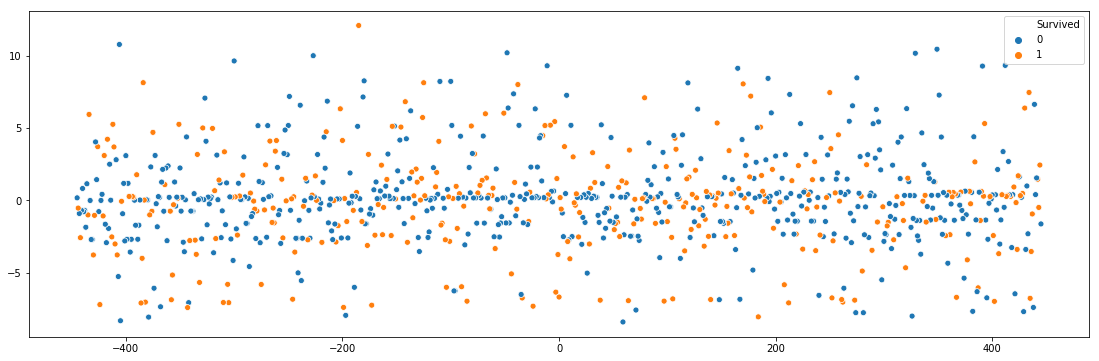

In [87]:
# This seems to be the reason why it is hard to score really well
sns.scatterplot(pca[:,0], pca[:,1], hue=train['Survived'])

(array([45., 44., 45., 45., 44., 44., 45., 45., 44., 44., 45., 44., 45.,
        45., 44., 45., 44., 45., 44., 45.]),
 array([-4.45000278e+02, -4.00500228e+02, -3.56000178e+02, -3.11500127e+02,
        -2.67000077e+02, -2.22500027e+02, -1.77999977e+02, -1.33499926e+02,
        -8.89998760e+01, -4.44998257e+01,  2.24540634e-04,  4.45002748e+01,
         8.90003251e+01,  1.33500375e+02,  1.78000426e+02,  2.22500476e+02,
         2.67000526e+02,  3.11500576e+02,  3.56000627e+02,  4.00500677e+02,
         4.45000727e+02]),
 <a list of 20 Patch objects>)

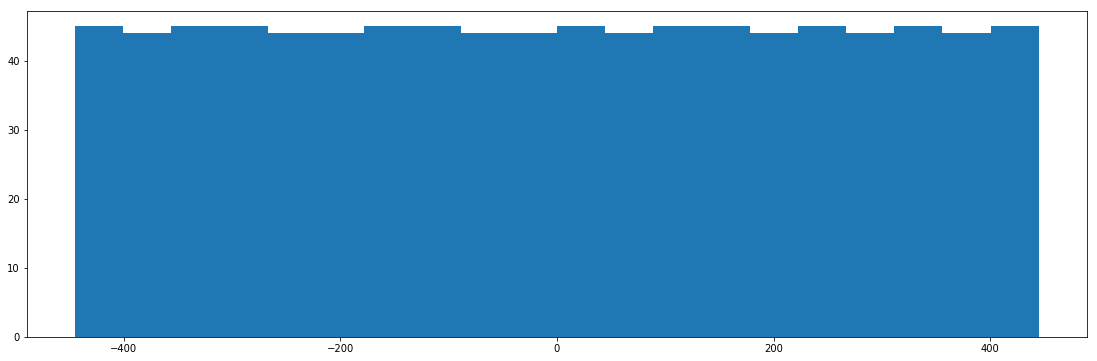

In [86]:
plt.hist(pca[:,0], bins = 20)

In [58]:
#print(pca.explained_variance_ratio_ / np.sum(pca.explained_variance_ratio_) * 100) 

### Tree models

### XGBoost

In [59]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits = 891, shuffle = True)

xgb_model = XGBClassifier(objective = 'binary:logistic')
xgb_val_pred = np.empty([891,])
for tr_ind, val_ind in kf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_ind], X_train.iloc[val_ind], y_train.iloc[tr_ind], y_train.iloc[val_ind]
    xgb_model.fit(X_tr, y_tr, 
              eval_set = [(X_tr, y_tr), (X_val, y_val)], 
              verbose = True, 
              early_stopping_rounds = 10)
    xgb_val_pred[val_ind] = xgb_model.predict(X_val)

print('Validation accuracy:', accuracy_score(y_train, xgb_val_pred) )

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-er

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	va

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0


[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validatio

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	va

Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0


Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	va

Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0


Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-er

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0


[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validatio

Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until vali

[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for ear

[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early sto

[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been pas

[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'valida

[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been pas

[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: '

[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have be

[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have be

[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
M

[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
M

[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_

[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_

[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iterati

[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-

[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	vali

[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-

[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	vali

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	vali

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	vali

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	vali

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	vali

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	vali

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.014607	validation_1-error:1
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-erro

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	valid

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	valid

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	valid

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error

[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics h

[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-err

[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	vali

[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	vali

[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best i

[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0

[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error

[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	val

[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:

[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:

[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:

[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-

[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	vali

[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:

[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:

[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	vali

[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0	validation_1-error:0

[0]	validation_0-error:0	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	vali

[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-error:0	validation_1-error:0
[7]	validation_0-error:0	validation_1-error:0
[8]	validation_0-error:0	validation_1-error:0
[9]	validation_0-error:0	validation_1-error:0
[10]	validation_0-error:0	validation_1-error:0
Stopping. Best iteration:
[0]	validation_0-error:0.01573	validation_1-error:0

[0]	validation_0-error:0.01573	validation_1-error:0
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 10 rounds.
[1]	validation_0-error:0	validation_1-error:0
[2]	validation_0-error:0	validation_1-error:0
[3]	validation_0-error:0	validation_1-error:0
[4]	validation_0-error:0	validation_1-error:0
[5]	validation_0-error:0	validation_1-error:0
[6]	validation_0-

In [60]:
xgb_model = XGBClassifier(objective = 'binary:logistic')

xgb_model.fit(X_train, y_train)
accuracy_score(y_train, xgb_model.predict(X_train))

1.0

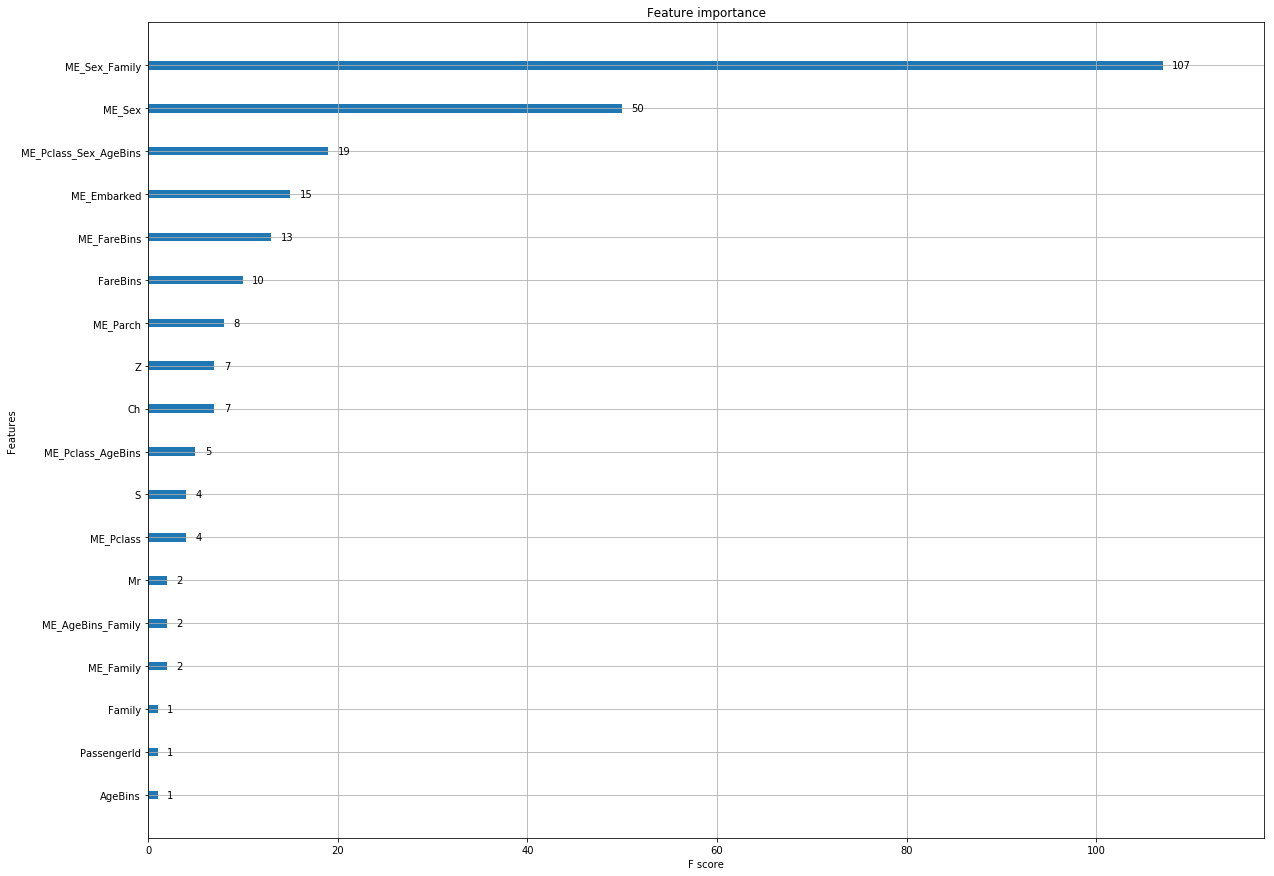

In [61]:
plt.rcParams["figure.figsize"] = (20, 15)
plot_importance(xgb_model)
plt.show()

### Catboost

In [62]:
import catboost
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(
                    iterations=50,
                    random_seed=63,
                    learning_rate=1,
                    custom_loss=['Logloss'],
                    #depth = 6,
                    verbose=10
                )

kf = KFold(n_splits = 30, shuffle = True)
catboost_val_pred = np.empty([891,])
for tr_ind, val_ind in kf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_ind], X_train.iloc[val_ind], y_train.iloc[tr_ind], y_train.iloc[val_ind]
    catboost_model.fit(
        X_tr, y_tr,
        #cat_features=cat_features,
        eval_set=(X_val, y_val),
        logging_level='Silent',
        plot= False
        )
    catboost_val_pred[val_ind] = catboost_model.predict(X_val)

print('Validation accuracy:', accuracy_score(y_train, catboost_val_pred) )

Validation accuracy: 1.0


In [63]:
catboost_model = CatBoostClassifier(
                    iterations=50,
                    random_seed=63,
                    learning_rate=1,
                    custom_loss=['Logloss'],
                    #depth = 6,
                    verbose=10
                )

catboost_model.fit(X_train, y_train)#X_train, y_train
accuracy_score(y_train, catboost_model.predict(X_train))

0:	learn: 0.0410245	total: 41.5ms	remaining: 2.04s
10:	learn: 0.0007127	total: 422ms	remaining: 1.5s
20:	learn: 0.0004105	total: 811ms	remaining: 1.12s
30:	learn: 0.0002765	total: 1.19s	remaining: 727ms
40:	learn: 0.0002132	total: 1.56s	remaining: 344ms
49:	learn: 0.0001818	total: 1.92s	remaining: 0us


1.0

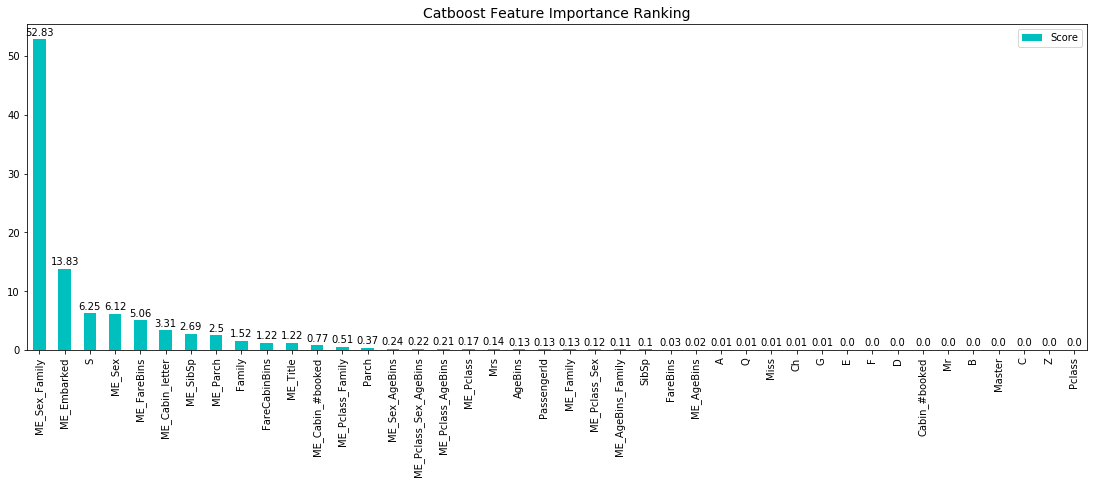

In [64]:
from catboost import Pool
feature_score = pd.DataFrame(list(zip(X_train.dtypes.index, catboost_model.get_feature_importance(Pool(X_train, label=y_train)))), columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (19, 6)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')
rects = ax.patches
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [65]:
if False:
    from catboost import cv

    params = {}
    params['loss_function'] = 'Logloss'
    params['iterations'] = 80
    params['custom_loss'] = 'AUC'
    params['random_seed'] = 63
    params['learning_rate'] = 0.5

    cv_data = cv(
        params = params,
        pool = Pool(X_train, label=y_train),#, cat_features=cat_features
        fold_count=5,
        inverted=False,
        shuffle=True,
        partition_random_seed=0,
        plot=True,
        stratified=True,
        verbose=False
    )

### Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=50,
                                 max_depth=6,
                                 verbose=False,
                                 n_jobs=-1
                                )
#kf = KFold(n_splits = 50, shuffle = True)
kf = StratifiedKFold(n_splits = 30, shuffle = True)
rf_val_pred = np.empty([891,])
for tr_ind, val_ind in kf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_ind], X_train.iloc[val_ind], y_train.iloc[tr_ind], y_train.iloc[val_ind]
    rf_model.fit(X_tr, y_tr)
    rf_val_pred[val_ind] = rf_model.predict(X_val)

print('Validation accuracy:', accuracy_score(y_train, rf_val_pred) )

Validation accuracy: 1.0


In [67]:
rf_model = RandomForestClassifier(n_estimators=50,
                                 max_depth=6,
                                 verbose=False,
                                 n_jobs=-1
                                )
rf_model.fit(X_train, y_train)
accuracy_score(y_train, rf_model.predict(X_train))

1.0

### Extra trees

In [68]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(n_estimators=200)

kf = StratifiedKFold(n_splits = 50 , shuffle = True)
#kf = KFold(n_splits = 891, shuffle = True)
etc_val_pred = np.empty([891,])
for tr_ind, val_ind in kf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_ind], X_train.iloc[val_ind], y_train.iloc[tr_ind], y_train.iloc[val_ind]
    etc_model.fit(X_tr, y_tr)
    etc_val_pred[val_ind] = etc_model.predict(X_val)
    
print('Validation accuracy:', accuracy_score(y_train, etc_val_pred) )

Validation accuracy: 1.0


In [69]:
etc_model = ExtraTreesClassifier(n_estimators=200)
etc_model.fit(X_train, y_train)
accuracy_score(y_train, etc_model.predict(X_train))

1.0

## Non-tree models

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'liblinear')

kf = StratifiedKFold(n_splits = 10 , shuffle = True)
#kf = KFold(n_splits = 891, shuffle = True)
lr_val_pred = np.empty([891,])
for tr_ind, val_ind in kf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_ind], X_train.iloc[val_ind], y_train.iloc[tr_ind], y_train.iloc[val_ind]
    lr_model.fit(X_tr, y_tr)
    lr_val_pred[val_ind] = lr_model.predict(X_val)
    
print('Validation accuracy:', accuracy_score(y_train, lr_val_pred) )

Validation accuracy: 0.8204264870931538


In [71]:
lr_model = LogisticRegression(solver = 'liblinear')
lr_model.fit(X_train, y_train)
accuracy_score(y_train, lr_model.predict(X_train))

0.835016835016835

### KNN

In [72]:
# Accuracy score dramatically deteriorate when PassengerId feature is included
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)

#kf = StratifiedKFold(n_splits = 5 , shuffle = True)
kf = KFold(n_splits = 50, shuffle = True)
knn_val_pred = np.empty([891,])
for tr_ind, val_ind in kf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_ind], X_train.iloc[val_ind], y_train.iloc[tr_ind], y_train.iloc[val_ind]
    knn_model.fit(X_tr, y_tr)
    knn_val_pred[val_ind] = knn_model.predict(X_val)
    
print('Validation accuracy:', accuracy_score(y_train, knn_val_pred) )

Validation accuracy: 0.5712682379349046


In [73]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
accuracy_score(y_train, knn_model.predict(X_train))

0.7227833894500562

### Support vector classifier

In [74]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#svc_model = SVC(gamma='auto')
svc_model = LinearSVC(max_iter=1000)

kf = StratifiedKFold(n_splits = 5 , shuffle = True)
#kf = KFold(n_splits = 891, shuffle = True)
svc_val_pred = np.empty([891,])
for tr_ind, val_ind in kf.split(X_train, y_train):
    X_tr, X_val, y_tr, y_val = X_train.iloc[tr_ind], X_train.iloc[val_ind], y_train.iloc[tr_ind], y_train.iloc[val_ind]
    svc_model.fit(X_tr, y_tr)
    svc_val_pred[val_ind] = svc_model.predict(X_val)
    
print('Validation accuracy:', accuracy_score(y_train, svc_val_pred) )

C:\Users\Philippe\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Philippe\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Philippe\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Philippe\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Validation accuracy: 0.7115600448933782


C:\Users\Philippe\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [75]:
svc_model = LinearSVC(max_iter=1000)
svc_model.fit(X_train, y_train)
accuracy_score(y_train, svc_model.predict(X_train))

C:\Users\Philippe\Anaconda3\envs\DeepLearning\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6588103254769921

### Ensembling (stacking) with tree based models

In [76]:
ensemble_test = pd.DataFrame()
ensemble_test['XGBoost'] = xgb_model.predict(X_test)
ensemble_test['CatBoost'] = catboost_model.predict(X_test)
ensemble_test['RandomForest'] = rf_model.predict(X_test) 
ensemble_test['ExtraTrees'] = etc_model.predict(X_test)
ensemble_test['LogisticRegression'] = lr_model.predict(X_test)
ensemble_test['Knn'] = knn_model.predict(X_test)
ensemble_test['SVC'] = svc_model.predict(X_test)
ensemble_test =ensemble_test.astype(int)

In [77]:
ensemble_test.head(10)

,XGBoost,CatBoost,RandomForest,ExtraTrees,LogisticRegression,Knn,SVC
0,0,0,0,0,0,0,0
1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0


In [78]:
ensemble_test.sum() / ensemble_test.count()

XGBoost               0.000000
CatBoost              0.033493
RandomForest          0.078947
ExtraTrees            0.265550
LogisticRegression    0.409091
Knn                   0.000000
SVC                   0.000000
dtype: float64

In [79]:
ensemble_test_preds = ( ensemble_test.sum(axis=1) >= 4 ) * 1

### Predictions file

In [83]:
titanic_submissions = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": ensemble_test['ExtraTrees'] #ensemble_test_preds 
    })
titanic_submissions.to_csv('titanic_submissions.csv', index=False)

In [84]:
titanic_submissions.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [85]:
titanic_submissions['Survived'].mean()

0.26555023923444976